In [2]:
import networkx as nx

In [5]:
def sucesores_lista_S(Pert,S): #Con esta funcion encontramos los sucesores de la lista de nodos etiquetdos
    sucesores = []
    for i in range(len(S)):
        for j in Pert.successors(S[i]):
            if j not in sucesores:
                sucesores.append(j)
    return sucesores

def predecesores_lista_sucesores(Pert,sucesores): #Con esta funcion encontramos todos los predecesores de los nodos de la función anterior, incluidos los que no estan en S
    diccionario_de_predecesores = {}
    for i in range(len(sucesores)):
        predecesores_de_cada_sucesor = []
        for j in Pert.predecessors(sucesores[i]):
            predecesores_de_cada_sucesor.append(j)
        diccionario_de_predecesores[sucesores[i]] = predecesores_de_cada_sucesor
    return diccionario_de_predecesores


def valor_a(Pert,predecesores_dic,indice,diccionario_a): #Con esta funcion calculamos el valor de las fechas mas próximas 
    maximo = []
    for i in range(len(predecesores_dic[indice])):
        maximo.append(diccionario_a[predecesores_dic[indice][i]] + Pert[predecesores_dic[indice][i]][indice]['weight'])
    return max(maximo)

def valor_b(Pert,diccionario_b,indice,sucesores): #Con esta función encontramos el valor de las fechas mas lejanas
    minimo = []
    for i in range(len(sucesores)):
        minimo.append(diccionario_b[sucesores[i]] - Pert[indice][sucesores[i]]['weight'])
    return min(minimo)

def holguras(Pert,diccionario_a,diccionario_b): #Con esta función encontramos el valor de las holguras de cada actividad (i,j)
    arcos = list(Pert.edges)
    holguras = {}
    for i in range(len(arcos)):
            holguras[(arcos[i][0],arcos[i][1])] = diccionario_b[arcos[i][1]] - diccionario_a[arcos[i][0]] - Pert[arcos[i][0]][arcos[i][1]]['weight']
    return holguras

def PERT(Pert,I,F): #Con esta funcion ejecutamos cada una de las funciones anteriores para hacer el algoritmo de PERT completo
    S = [I] #Iniciamos la lista con el nodo inicial que nos da el usuario
    a = {I : 0} #Usamos un diccionario para asignarle un valor a la actividad a
    while len(S) != len(Pert.nodes): #Ejecutamos el algoritmo hasta que la lista S tenga la misma cantidad de elementos que la cantidad de nodos en la red
        sucesores = sucesores_lista_S(Pert,S)
        predecesores = predecesores_lista_sucesores(Pert,sucesores)
        for i in range(len(sucesores)):
            if sucesores[i] not in S: #Si el nodo no esta etiquetada avanzamos
                if set(predecesores[sucesores[i]]) <= set(S): #Aquí verificamos que todos los antecesores del nodo electo esten en la lista
                    a[sucesores[i]] = valor_a(Pert,predecesores,sucesores[i],a) #Asignamos el valor de a
                    S.append(sucesores[i]) #Lo agregamos a la lista

    S = [F] #Iniciamos la lista con el nodo final que nos da el usuario
    b = {F : a[F]} #Asignamos el valor de b(F)
    while len(S) != len(Pert.nodes): #Ejecutamos el algoritmo hasta que S tenga la misma cantidad de nodos que los que hay en la red
        predecesores = predecesores_lista_sucesores(Pert,S) #Encontramos todos los predecesores de los nodos en S
        for i in predecesores:
            sucesores = predecesores[i] #Encontramos todos los sucesores ed cada nodo, incluso los que no estan en S
            for j in sucesores:
                if j not in S: #Si el nodo electo no esta en la lista avanzamos
                    if set(sucesores_lista_S(Pert,[j])) <= set(S): #Revisamos que todos los sucesores del nodo esten en S
                        b[j] = valor_b(Pert,b,j,sucesores_lista_S(Pert,[j])) #Asignamos el valor b del nodo
                        S.append(j) #Lo agregamos a la lista

    Holguras = holguras(Pert,a,b) #Encontramos las holguras de cada actividad
    Ruta_critica = [] #Iniciamos la lista de la ruta critica 
    for i in Holguras:
        if Holguras[i] == 0: #Revisamos que el arco electo tenga holgura 0, si es verdadero se agrega en la lista
            Ruta_critica.append(i)

    
    print(f'Calendario de fechas mas próximas: {a}\nCalendario de fechas mas lejanas: {b}\nHolguras: {Holguras}\nRuta critica: {Ruta_critica}') #Mostramos el resultado 
    nx.draw_planar(Pert) #Dibujamos la red PERT completa

Calendario de fechas mas próximas: {'I': 0, 'i1': 4, 'i2': 10, 'i3': 13, 'F': 20}
Calendario de fechas mas lejanas: {'F': 20, 'i3': 13, 'i2': 13, 'i1': 4, 'I': 0}
Holguras: {('I', 'i1'): 0, ('I', 'i2'): 3, ('I', 'i3'): 0, ('i1', 'i2'): 5, ('i1', 'i3'): 0, ('i2', 'F'): 3, ('i3', 'F'): 0}
Ruta critica: [('I', 'i1'), ('I', 'i3'), ('i1', 'i3'), ('i3', 'F')]


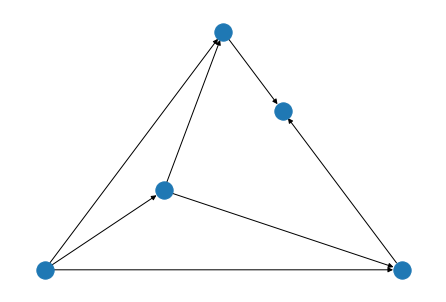

In [8]:
#Ejemplo del libro
Pert = nx.DiGraph()
edges = [("I","i1"),('I','i2'),('I','i3'),('i1','i2'),('i1','i3'),('i3','F'),('i2','F')]
Pert.add_edges_from(edges)
weight = [("I","i1",4),('I','i2',10),('I','i3',13),('i1','i2',4),('i1','i3',9),('i3','F',7),('i2','F',7)]
Pert.add_weighted_edges_from(weight)
PERT(Pert,'I','F')

Calendario de fechas mas próximas: {'I': 0, 1: 30, 2: 2, 3: 7, 4: 15, 6: 25, 7: 35, 8: 45, 'F': 75}
Calendario de fechas mas lejanas: {'F': 75, 8: 45, 7: 35, 1: 30, 2: 32, 3: 10, 6: 33, 4: 23, 'I': 0}
Holguras: {('I', 1): 0, ('I', 2): 30, ('I', 3): 3, ('I', 4): 8, ('I', 8): 30, (1, 7): 0, (2, 7): 30, (3, 7): 3, (4, 6): 8, (8, 'F'): 0, (7, 8): 0, (6, 7): 8}
Ruta critica: [('I', 1), (1, 7), (8, 'F'), (7, 8)]


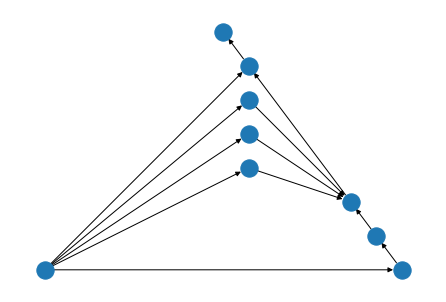

In [9]:
#Ejemplo de una tarea
Pert2 = nx.DiGraph()
edges = [("I",1),('I',2),('I',3),('I',4),('I',8),(1,7),(2,7),(3,7),(4,6),(6,7),(7,8),(8,"F")]
Pert2.add_edges_from(edges)
weight = [("I",1,30),('I',2,2),('I',3,7),('I',4,15),('I',8,15),(1,7,5),(2,7,3),(3,7,25),(4,6,10),(6,7,2),(7,8,10),(8,"F",30)]
Pert2.add_weighted_edges_from(weight)
PERT(Pert2,'I','F')

Calendario de fechas mas próximas: {'I': 0, 1: 3, 2: 18, 3: 28, 4: 30, 5: 38, 6: 40, 7: 40, 8: 38, 10: 50, 9: 60, 12: 80, 13: 83, 11: 83, 15: 98, 14: 108, 16: 116, 'F': 124}
Calendario de fechas mas lejanas: {'F': 124, 16: 116, 14: 108, 15: 98, 11: 83, 13: 83, 7: 75, 8: 77, 12: 80, 9: 60, 5: 40, 10: 50, 6: 40, 4: 30, 3: 28, 2: 18, 1: 3, 'I': 0}
Holguras: {('I', 1): 0, (1, 2): 0, (2, 3): 0, (3, 4): 0, (4, 5): 2, (4, 6): 0, (4, 7): 35, (4, 8): 39, (4, 15): 63, (5, 9): 2, (6, 10): 0, (7, 11): 35, (8, 11): 39, (15, 14): 0, (9, 12): 0, (10, 9): 0, (11, 15): 0, (14, 16): 0, (12, 13): 0, (13, 11): 0, (13, 14): 17, (16, 'F'): 0}
Ruta critica: [('I', 1), (1, 2), (2, 3), (3, 4), (4, 6), (6, 10), (15, 14), (9, 12), (10, 9), (11, 15), (14, 16), (12, 13), (13, 11), (16, 'F')]


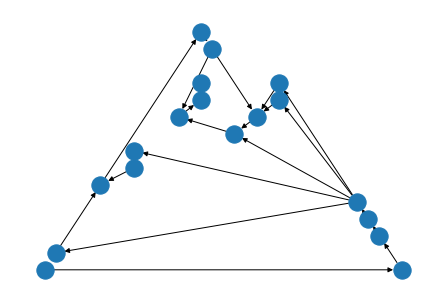

In [10]:
#Este ejemplo esta en libro de introduccion a la programacion lineal, es el ejemplo de la creacion de una nueva carrera
Pert3 = nx.DiGraph()
edges = [("I",1),(1,2),(2,3),(3,4),(4,5),(4,6),(4,7),(4,8),(4,15),(5,9),(6,10),(7,11),(8,11),(15,14),(10,9),(9,12),(12,13),(13,11),(13,14),(11,15),(14,16),(16,'F')]
Pert3.add_edges_from(edges)
weight = [("I",1,3),(1,2,15),(2,3,10),(3,4,2),(4,5,8),(4,6,10),(4,7,10),(4,8,8),(4,15,5),(5,9,20),(6,10,10),(7,11,8),(8,11,6),(15,14,10),(10,9,10),(9,12,20),(12,13,3),(13,11,0),(13,14,8),(11,15,15),(14,16,8),(16,'F',8)]
Pert3.add_weighted_edges_from(weight)
PERT(Pert3,'I','F')